In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
from pathlib import Path
import cmocean as cmo
import numpy as np
import gsw
from pathlib import Path
import xarray as xr

In [2]:
file_path = r"C:\Users\Sussi\OneDrive - University of Gothenburg\Master\observing\project\PROJECT-1\Data\67faed3fdbb125c2979b8ea8e99502f8.nc"

era5_df = xr.open_dataset(file_path)

In [8]:
era5_df

<xarray.Dataset>
Dimensions:     (valid_time: 2, latitude: 13, longitude: 13)
Coordinates:
    number      int64 ...
  * valid_time  (valid_time) datetime64[ns] 2025-05-08T07:00:00 2025-05-08T16...
  * latitude    (latitude) float64 59.0 58.75 58.5 58.25 ... 56.5 56.25 56.0
  * longitude   (longitude) float64 9.0 9.25 9.5 9.75 ... 11.25 11.5 11.75 12.0
    expver      (valid_time) object ...
Data variables:
    u10         (valid_time, latitude, longitude) float32 -0.5423 ... 1.21
    v10         (valid_time, latitude, longitude) float32 -0.2498 ... -4.264
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-22T11:43 GRIB to CDM+CF via cfgrib-0.9.1...

In [6]:
u = era5_df['u10']
v = era5_df['v10']

wind_vektor = np.sqrt(u**2+v**2)

In [11]:
wind_vektor

<xarray.DataArray (valid_time: 2, latitude: 13, longitude: 13)>
array([[[0.59703034, 0.80667764, 0.94208854, 1.1844406 , 1.209531  ,
         0.8745793 , 0.9325273 , 1.0716106 , 1.3123053 , 1.5200872 ,
         1.8243468 , 1.8309977 , 1.9311893 ],
        [0.85146016, 1.0552989 , 1.0496484 , 0.67389315, 0.67332876,
         0.5726617 , 0.4115373 , 0.49165642, 0.90297633, 1.0252242 ,
         1.2885703 , 1.5493563 , 1.7595166 ],
        [1.1218215 , 1.0866265 , 1.099771  , 0.9343509 , 0.8349965 ,
         0.64422816, 0.92009014, 0.82483107, 0.55704266, 0.26615378,
         0.52536696, 0.9632597 , 1.5309702 ],
        [1.1691741 , 1.3704457 , 1.7018403 , 1.5569005 , 1.5549742 ,
         1.250547  , 1.029991  , 0.8485274 , 0.8051272 , 0.54758835,
         0.43304998, 0.43962222, 0.9804876 ],
        [0.80333126, 1.1244062 , 1.4988673 , 1.3000807 , 1.1296022 ,
         0.598238  , 0.35733742, 0.6756107 , 1.109254  , 1.0552262 ,
         1.0138316 , 0.7107079 , 0.5337267 ],
        [1.9203837 , 1.4380268 , 0.9899156 , 0.50889564, 0.09120595,
         0.4464915 , 0.98170614, 1.2809477 , 1.600665  , 1.3422735 ,
         1.1542114 , 0.84852785, 0.5472228 ],
        [2.5395753 , 1.8842088 , 1.1953015 , 0.8582222 , 0.77244294,
         1.378728  , 2.0258443 , 2.1555793 , 2.311425  , 1.7892079 ,
...
         1.2908177 , 1.2749442 , 1.2787862 , 1.8312767 , 2.7659938 ,
         3.9630306 , 3.6751528 , 3.299004  ],
        [5.0409307 , 4.4608145 , 4.1131325 , 2.9062123 , 1.6551406 ,
         0.825097  , 2.168187  , 1.6588268 , 1.9491135 , 2.8810258 ,
         4.223648  , 4.183853  , 4.3267426 ],
        [4.50159   , 3.9313116 , 3.353425  , 1.897685  , 0.65446025,
         1.316484  , 2.496069  , 1.844994  , 1.8832392 , 2.502264  ,
         3.7897322 , 4.553101  , 4.9220805 ],
        [3.7285597 , 3.1712048 , 2.3240297 , 1.0015112 , 0.45963535,
         1.5436727 , 2.1883476 , 1.5813855 , 1.3443451 , 1.8997314 ,
         3.0689445 , 4.1167736 , 4.8080215 ],
        [2.97285   , 2.4798055 , 1.5429355 , 1.0656387 , 1.1099523 ,
         2.0273883 , 1.7873727 , 1.0125456 , 0.6413591 , 1.4577755 ,
         2.3079374 , 3.508088  , 4.546874  ],
        [2.6877456 , 1.9505605 , 1.479062  , 1.4428914 , 1.6107688 ,
         1.6697675 , 1.4459745 , 0.640221  , 0.4235488 , 1.2577989 ,
         2.3136582 , 3.2485788 , 4.524413  ],
        [2.5971673 , 1.7546262 , 1.9318486 , 2.3456964 , 2.4591115 ,
         1.9526433 , 1.5916224 , 1.2054896 , 1.5168105 , 2.1280065 ,
         3.2951334 , 4.118435  , 4.432505  ]]], dtype=float32)
Coordinates:
    number      int64 0
  * valid_time  (valid_time) datetime64[ns] 2025-05-08T07:00:00 2025-05-08T16...
  * latitude    (latitude) float64 59.0 58.75 58.5 58.25 ... 56.5 56.25 56.0
  * longitude   (longitude) float64 9.0 9.25 9.5 9.75 ... 11.25 11.5 11.75 12.0
    expver      (valid_time) object '0005' '0005'

In [13]:
# Inspect dimensions first (optional)
print(u.dims)  # should be something like ('time', 'latitude', 'longitude') or ('time', 'expver', 'latitude', 'longitude')

# Correctly extract wind speed at the first time step
# If dimensions are ('time', 'expver', 'latitude', 'l


('valid_time', 'latitude', 'longitude')


In [16]:
# Compute wind speed across all time steps
u_data = u  # already (time, lat, lon)
v_data = v
wind_speed = np.sqrt(u_data**2 + v_data**2)

# Get coordinates and time
lat = era5_df['latitude'].values
lon = era5_df['longitude'].values
times = era5_df['valid_time'].values
lon2d, lat2d = np.meshgrid(lon, lat)


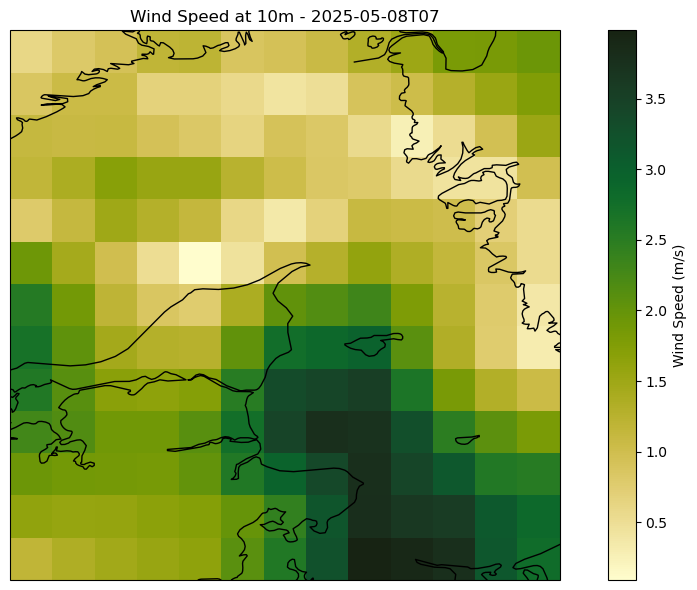

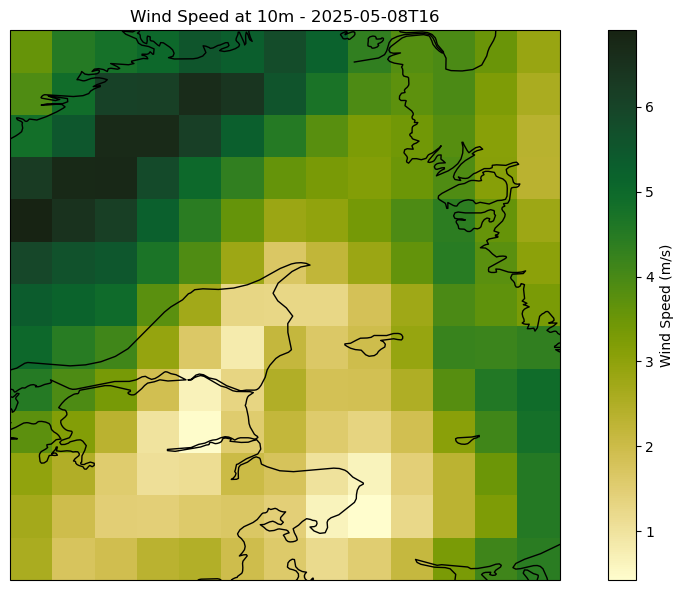

In [17]:
for i in range(len(times)):
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    cf = ax.pcolormesh(lon2d, lat2d, wind_speed[i, :, :], cmap='cmo.speed', shading='auto')
    
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS)
    ax.set_title(f'Wind Speed at 10m - {np.datetime_as_string(times[i], unit="h")}')
    plt.colorbar(cf, label='Wind Speed (m/s)')
    plt.tight_layout()
    plt.show()
